<a href="https://colab.research.google.com/github/anushka1947/Machine-Learning/blob/main/Missile_Data_Analysis_%26_Prediction_Using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploring the Dataset


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  confusion_matrix , classification_report,roc_curve,auc
from xgboost import XGBClassifier


In [ ]:
from google.colab import files
df=files.upload()

Saving Synthetic_Missile_Data.csv to Synthetic_Missile_Data (3).csv


In [ ]:
df=pd.read_csv('Synthetic_Missile_Data.csv')
print(df.head())

       Mass_kg       Thrust_N  Drag_Coeff  Lift_Coeff  Wind_Speed   Humidity  \
0  2185.430535  225876.282397    0.204682    1.107244   17.159876  41.490842   
1  4778.214379  564805.900009    0.198792    1.256018   24.162970  47.874853   
2  3793.972738  879298.544083    0.462502    0.600561   22.804828  78.363791   
3  3193.963179  745613.642089    0.199818    1.049849    4.616997  37.200351   
4  1202.083882  816233.090468    0.208780    0.986095    4.477484  79.571975   

   Temperature  Thrust_to_Weight  Aerodynamic_Stability  Weather_Impact  \
0    28.895417         10.535730               0.184857        2.357188   
1     0.343182         12.049377               0.158271        4.229717   
2    42.343674         23.625072               0.770116        5.664370   
3    26.786974         23.796601               0.190331        0.572633   
4    -0.567767         69.216624               0.211724        1.307063   

   Result  
0       1  
1       1  
2       0  
3       1  
4       

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Mass_kg                1000 non-null   float64
 1   Thrust_N               1000 non-null   float64
 2   Drag_Coeff             1000 non-null   float64
 3   Lift_Coeff             1000 non-null   float64
 4   Wind_Speed             1000 non-null   float64
 5   Humidity               1000 non-null   float64
 6   Temperature            1000 non-null   float64
 7   Thrust_to_Weight       1000 non-null   float64
 8   Aerodynamic_Stability  1000 non-null   float64
 9   Weather_Impact         1000 non-null   float64
 10  Result                 1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB
None


In [ ]:
print(df.isnull().sum())

Mass_kg                  0
Thrust_N                 0
Drag_Coeff               0
Lift_Coeff               0
Wind_Speed               0
Humidity                 0
Temperature              0
Thrust_to_Weight         0
Aerodynamic_Stability    0
Weather_Impact           0
Result                   0
dtype: int64


Exploratory Data Analysis (EDA)

In [ ]:
print(df.columns)

Index(['Altitude_km', 'Velocity_mps', 'Payload_kg', 'Fuel_Type',
       'Launch_Angle_deg', 'Launch_Site', 'Weather_Temp_C',
       'Weather_WindSpeed_mps', 'Weather_Humidity', 'Guidance_Type', 'Result'],
      dtype='object')


In [ ]:
df['Thrust_to_Weight'] = df['Thrust_N'] / (df['Mass_kg']*9.81)
df['Aerodynamic_Stability'] =df['Drag_Coeff'] /df['Lift_Coeff']
df['Weather_Impact'] =df['Wind_Speed'] *df['Humidity']/df['Temperature']
df.dropna(inplace=True)



<ipython-input-54-608adc7e5075>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Result',data=df,palette='coolwarm')


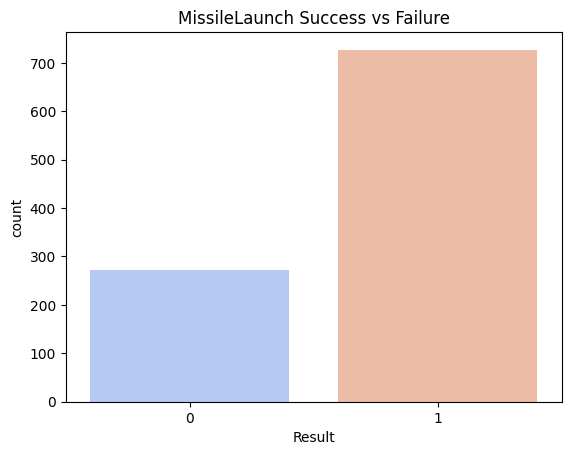

In [ ]:


#Count Success Vs Failure
sns.countplot(x='Result',data=df,palette='coolwarm')
plt.title("MissileLaunch Success vs Failure")
plt.show()

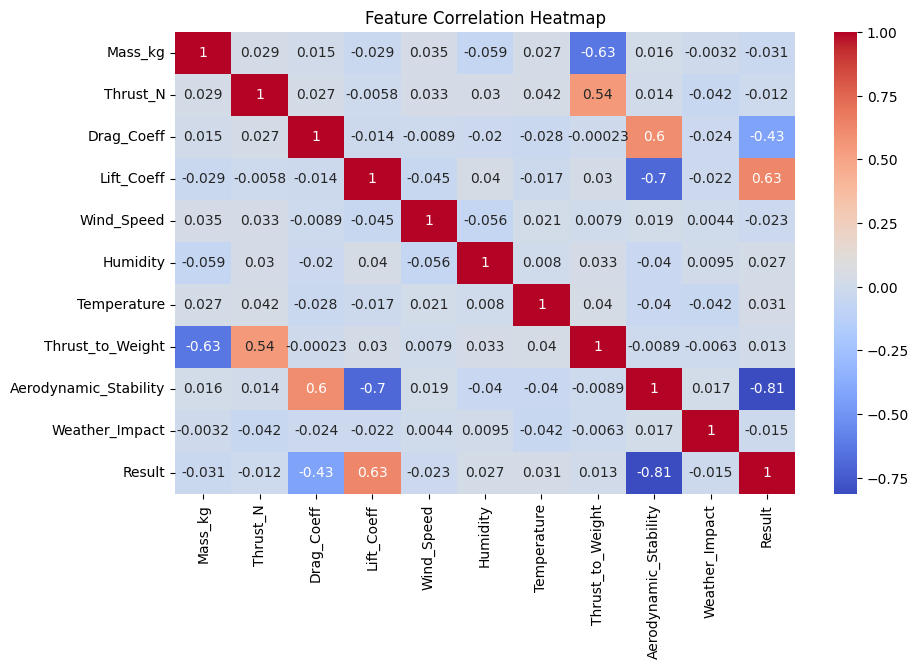

In [ ]:
#Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True ,cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

Split Data for Training & Testing

In [ ]:
X = df.drop(columns=['Result'])
y = df['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train ML Models
Using Random Forest model,XGBoost model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model=RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(x_train ,y_train)
y_pred_rf=rf_model.predict(x_test)

accuracy_rf=accuracy_score(y_test,y_pred_rf)
print(f'Random Forest Model Accuracy: {accuracy_rf: 2f}')

Random Forest Model Accuracy:  1.000000


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier(n_estimators=100,learning_rate=0.1,random_state=42)
xgb_model.fit(x_train,y_train)
y_pred_xgb=xgb_model.predict(x_test)

accuracy_xgb=accuracy_score(y_test,y_pred_xgb)
print(f"XGBoost Model Accuracy : {accuracy_xgb: 2f}")

XGBoost Model Accuracy :  1.000000


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


Model Evaluation & Improvement

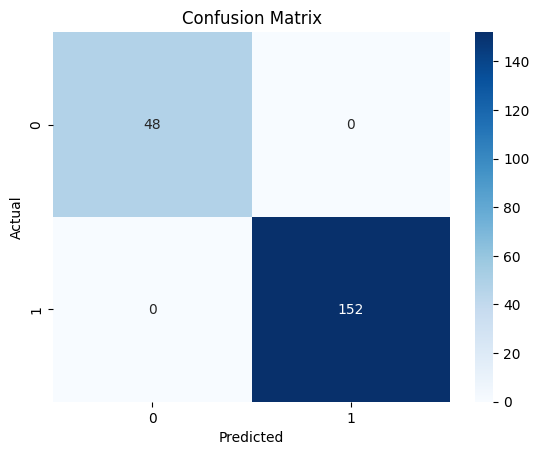

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00       152

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



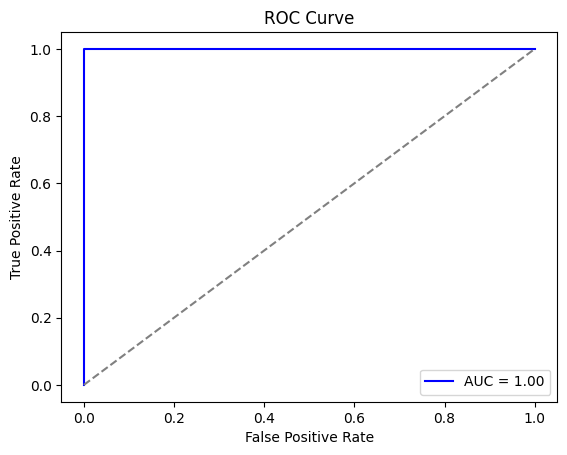

In [ ]:
y_prob = rf.predict_proba(X_test)[:, 1]  # Probabilities for ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Explainable AI: Feature Importance Analysis

<ipython-input-87-6892a6fc114b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=X.columns[sorted_idx], y=feature_importance[sorted_idx], palette='viridis')


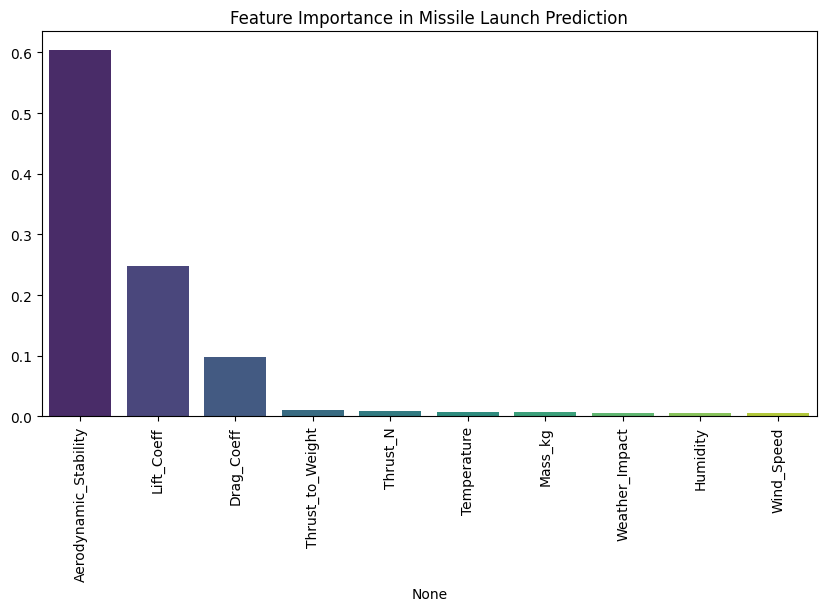

In [ ]:
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10,5))
sns.barplot(x=X.columns[sorted_idx], y=feature_importance[sorted_idx], palette='viridis')
plt.xticks(rotation=90)
plt.title('Feature Importance in Missile Launch Prediction')
plt.show()

Hyperparameter Tuning Using GridSearchCV

In [ ]:
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print('Best Parameters:', grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'n_estimators': 50}
